<h2>Don't Overfit </h2>

<h2>Problem Statement </h2>

- Donot Overfit 2 is a unique problem statement where we are provided with only 250 training samples and 19750 test samples.
- The Objective of the problem is not to overfit with this train data and generalize well with our test data samples.
- The data set consists of 300 continuous random variables each standardized with mean centered to zero and variance 1.

<h2> Performance Metrics Used </h2>

- The Problem uses ROC AUC SCORE as the metric to measure the model performance

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import sklearn
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RepeatedStratifiedKFold
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
pd.options.mode.chained_assignment = None   # default='warn'
from mlxtend.classifier import StackingClassifier
from sklearn.linear_model import Lasso
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from scipy.stats import randint as sp_randint
from scipy.stats import uniform
from scipy import stats
import xgboost as xgb

<h1>Getting the Data into Data Frame </h1>

In [2]:
train_data=pd.read_csv("train.csv")
test_data=pd.read_csv("test.csv")

<h1>Exploratory Data Analysis </h1>

In [6]:
train_data.describe()

,id,target,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,...,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,124.500000,0.640000,0.023292,-0.026872,0.167404,0.001904,0.001588,-0.007304,0.032052,0.078412,...,0.044652,0.126344,0.018436,-0.012092,-0.065720,-0.106112,0.046472,0.006452,0.009372,-0.128952
std,72.312977,0.480963,0.998354,1.009314,1.021709,1.011751,1.035411,0.955700,1.006657,0.939731,...,1.011416,0.972567,0.954229,0.960630,1.057414,1.038389,0.967661,0.998984,1.008099,0.971219
min,0.000000,0.000000,-2.319000,-2.931000,-2.477000,-2.359000,-2.566000,-2.845000,-2.976000,-3.444000,...,-2.804000,-2.443000,-2.757000,-2.466000,-3.287000,-3.072000,-2.634000,-2.776000,-3.211000,-3.500000
25%,62.250000,0.000000,-0.644750,-0.739750,-0.425250,-0.686500,-0.659000,-0.643750,-0.675000,-0.550750,...,-0.617000,-0.510500,-0.535750,-0.657000,-0.818500,-0.821000,-0.605500,-0.751250,-0.550000,-0.754250
50%,124.500000,1.000000,-0.015500,0.057000,0.184000,-0.016500,-0.023000,0.037500,0.060500,0.183500,...,0.067500,0.091000,0.057500,-0.021000,-0.009000,-0.079500,0.009500,0.005500,-0.009000,-0.132500
75%,186.750000,1.000000,0.677000,0.620750,0.805000,0.720000,0.735000,0.660500,0.783250,0.766250,...,0.797250,0.804250,0.631500,0.650250,0.739500,0.493000,0.683000,0.794250,0.654250,0.503250
max,249.000000,1.000000,2.567000,2.419000,3.392000,2.771000,2.901000,2.793000,2.546000,2.846000,...,2.865000,2.801000,2.736000,2.596000,2.226000,3.131000,3.236000,2.626000,3.530000,2.771000


In [3]:
train_data.head(3)

,id,target,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
0,0,1.0,-0.098,2.165,0.681,-0.614,1.309,-0.455,-0.236,0.276,...,0.867,1.347,0.504,-0.649,0.672,-2.097,1.051,-0.414,1.038,-1.065
1,1,0.0,1.081,-0.973,-0.383,0.326,-0.428,0.317,1.172,0.352,...,-0.165,-1.695,-1.257,1.359,-0.808,-1.624,-0.458,-1.099,-0.936,0.973
2,2,1.0,-0.523,-0.089,-0.348,0.148,-0.022,0.404,-0.023,-0.172,...,0.013,0.263,-1.222,0.726,1.444,-1.165,-1.544,0.004,0.800,-1.211


In [4]:
train_data.columns

Index(['id', 'target', '0', '1', '2', '3', '4', '5', '6', '7',
       ...
       '290', '291', '292', '293', '294', '295', '296', '297', '298', '299'],
      dtype='object', length=302)

In [5]:
test_data.head(2)

,id,0,1,2,3,4,5,6,7,8,...,290,291,292,293,294,295,296,297,298,299
0,250,0.500,-1.033,-1.595,0.309,-0.714,0.502,0.535,-0.129,-0.687,...,-0.088,-2.628,-0.845,2.078,-0.277,2.132,0.609,-0.104,0.312,0.979
1,251,0.776,0.914,-0.494,1.347,-0.867,0.480,0.578,-0.313,0.203,...,-0.683,-0.066,0.025,0.606,-0.353,-1.133,-3.138,0.281,-0.625,-0.761


<h4>Columns Description </h4>

- ID- Unique No for Each Datapoint
- Target-Independent Variable
- 0-299-Features having a mean close to 0 and standard deviation 1.

<h3>Check Null Values </h3>

<h5> Q. Is there any null values in this dataset?If yes then how many by count and percentage? </h5>

In [7]:
print((train_data.isna().sum()/train_data.shape[0])*100)

id        0.0
target    0.0
0         0.0
1         0.0
2         0.0
         ... 
295       0.0
296       0.0
297       0.0
298       0.0
299       0.0
Length: 302, dtype: float64


In [8]:
print((test_data.isna().sum()/test_data.shape[0])*100)

id     0.0
0      0.0
1      0.0
2      0.0
3      0.0
      ... 
295    0.0
296    0.0
297    0.0
298    0.0
299    0.0
Length: 301, dtype: float64


- Seems like we dont have null values in our data

<h3>Distribution of Target variable of Train Data Points </h3>

Text(0, 0.5, 'counts')

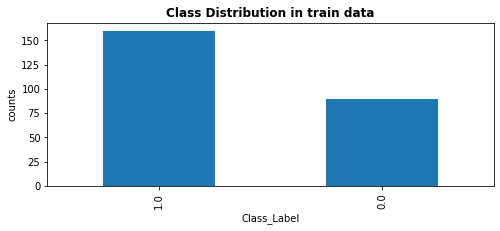

In [9]:
plt.figure(figsize=(8,3))
ax =train_data.target.value_counts().plot(kind='bar')
plt.title('Class Distribution in train data', weight='bold')
plt.xlabel('Class_Label')
plt.ylabel('counts')


<b>
    
- We have 160 data points belonging to Class 1
- We have 90 data points belonging to Class 2
- The Dataset is imbalanced 
    
<b>

In [10]:
train_data['target'].value_counts()

1.0    160
0.0     90
Name: target, dtype: int64

<h2>KS-TEST TRAIN DATA OF SAMPLE 250 PTS</h2>

KstestResult(statistic=0.03171261921735258, pvalue=0.9630294012606941)


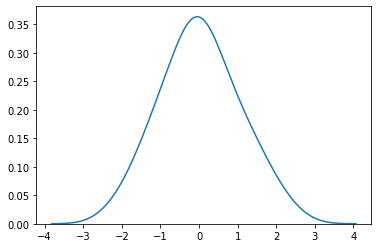

KstestResult(statistic=0.04136319722522663, pvalue=0.7857765399000378)


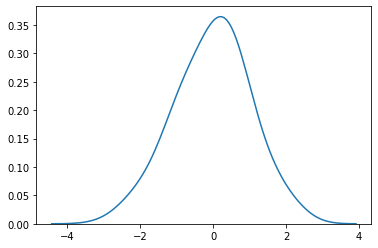

KstestResult(statistic=0.10678169211374755, pvalue=0.006165025199299171)


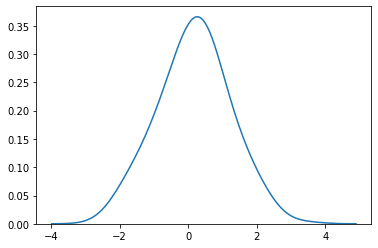

KstestResult(statistic=0.030792214968717868, pvalue=0.9717286095262895)


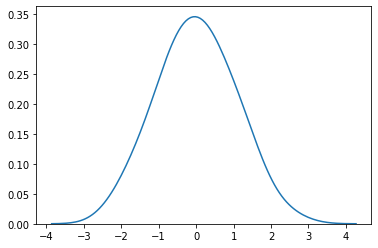

KstestResult(statistic=0.038500486757252816, pvalue=0.8524941994125361)


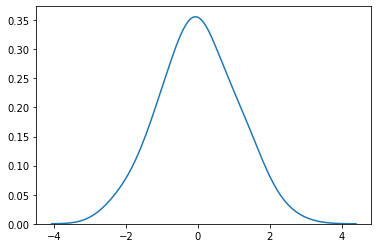

KstestResult(statistic=0.040963628200492375, pvalue=0.7955785542603029)


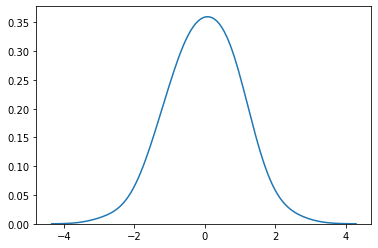

KstestResult(statistic=0.053944034605123536, pvalue=0.4504729471406711)


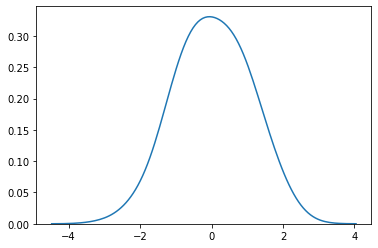

KstestResult(statistic=0.07831497553761624, pvalue=0.08828235812070054)


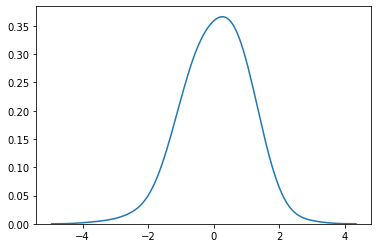

KstestResult(statistic=0.05144623171344842, pvalue=0.5147258593904032)


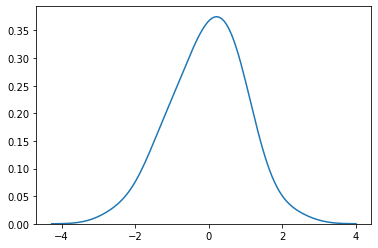

KstestResult(statistic=0.0393009539263684, pvalue=0.8347394170653292)


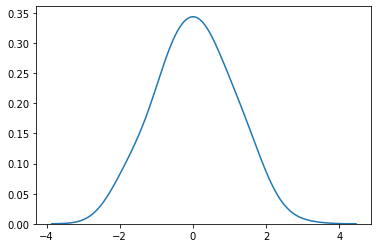

KstestResult(statistic=0.05149200856259806, pvalue=0.5134984920818352)


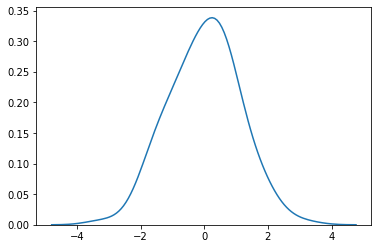

KstestResult(statistic=0.061096941243909686, pvalue=0.29703084400292784)


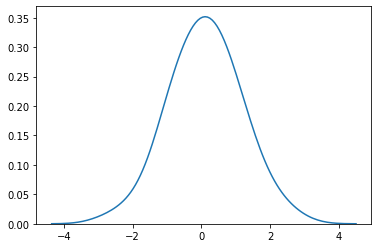

KstestResult(statistic=0.04918316271726686, pvalue=0.5776907366915892)


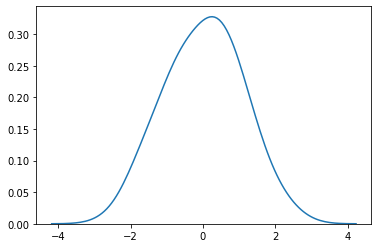

KstestResult(statistic=0.035300953926368395, pvalue=0.914390751844368)


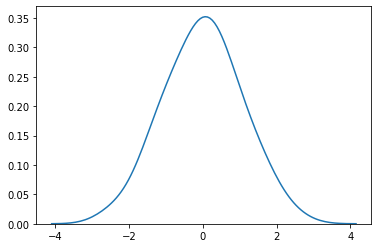

KstestResult(statistic=0.05159775312640458, pvalue=0.5106703473467841)


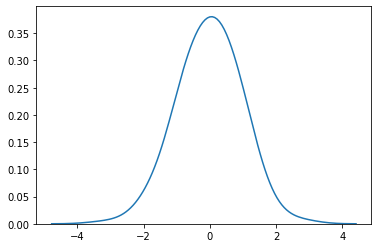

KstestResult(statistic=0.04670447225369956, pvalue=0.6516761026285204)


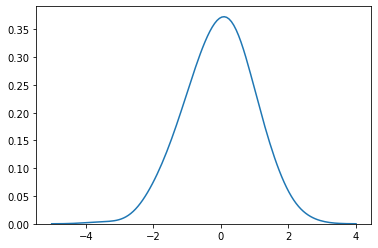

KstestResult(statistic=0.0671874568912148, pvalue=0.2000831519397673)


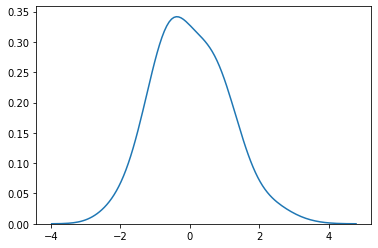

KstestResult(statistic=0.06755946289143283, pvalue=0.1950766170905474)


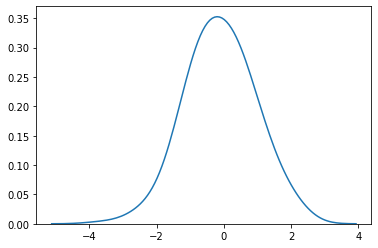

KstestResult(statistic=0.03918239942009802, pvalue=0.8374181676483494)


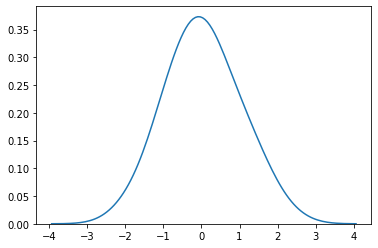

KstestResult(statistic=0.035467031395539805, pvalue=0.9115799161732249)


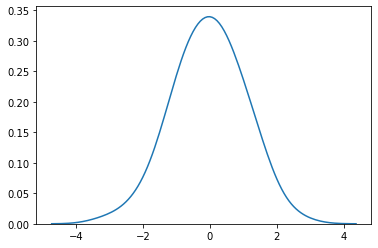

KstestResult(statistic=0.06915888374918011, pvalue=0.17466266738156241)


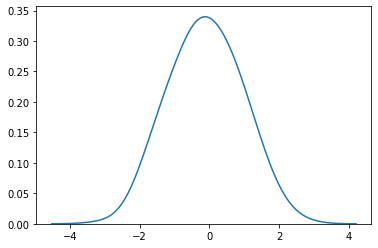

KstestResult(statistic=0.0501110886094247, pvalue=0.551333849953259)


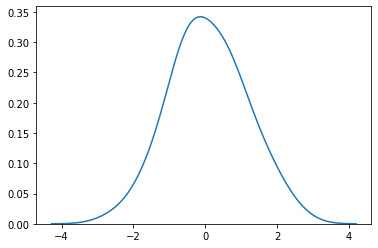

KstestResult(statistic=0.05690330975007296, pvalue=0.38154472397148226)


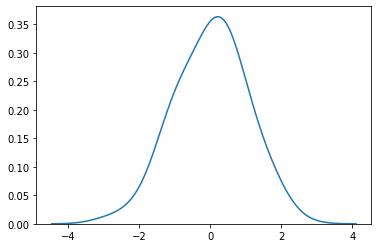

KstestResult(statistic=0.037660945578836036, pvalue=0.8702211833921591)


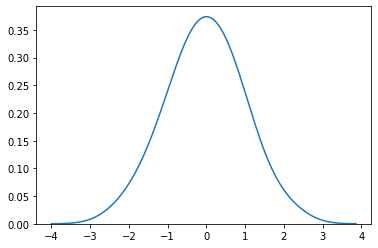

KstestResult(statistic=0.08189582753034802, pvalue=0.06607087878107515)


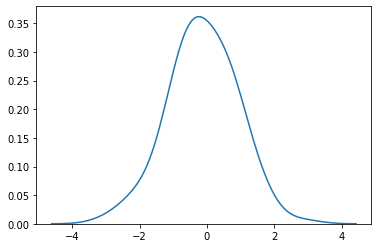

In [11]:
for i in range(0,25):
    sns.kdeplot(np.array(train_data[str(i)]), bw=0.5)
    print(stats.kstest(train_data[str(i)],"norm"))
    plt.show()

- <b>By seeing the above plots of KS-Test we can see that most of our plots follow a gaussian like curve (Bell Curve) with a high
  p value.We can conclude saying that most of our features follow a Gaussian Distribution with mean close to 0  and std-dev       close to 1.Most importantly this plot is just over a sample of 250 pts.As no of pts increases,This will follow Gaussian.
  Let's ensure this by plotting a KS PLOT FOR THE TEST SET Feature which has 19750 Points.</b>

<h3>Test-Data  </h3>

KstestResult(statistic=0.008675831943463025, pvalue=0.10226846130903085)


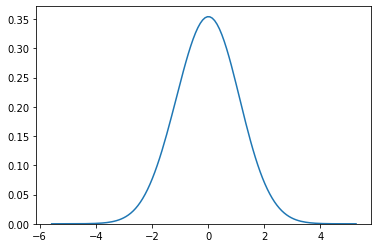

KstestResult(statistic=0.0046406094845576895, pvalue=0.7886496588520177)


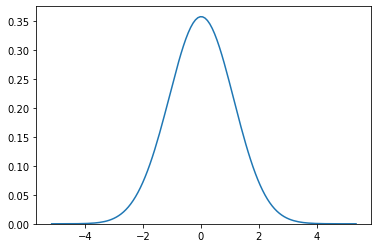

In [12]:
for i in range(0,2):
    sns.kdeplot(np.array(test_data[str(i)]), bw=0.5)
    print(stats.kstest(test_data[str(i)],"norm"))
    plt.show()

<h1>EDA SUMMARY </h1>

- <b> We only have 250 data points as our whole data to train our model. </b>
- <b> We have a total of 300 features and by EDA we get to know that each feature follow a gaussian disb with mean close to 0 and std-dev very close to 1 </b>

<h3>Simple First-Cut Solution using Logistic Regression and RepeatedStratifiedKFold</h3>

<h5>Data Split</h5>

In [13]:
train_data["target"]=train_data["target"].astype(int)
train_data=train_data.drop("id",axis=1)
X=train_data.drop("target",axis=1)
Y=train_data['target']
test=test_data.drop("id",axis=1)

<h4>Random Search and Stratified-K-Fold Strategy </h4>

In [14]:
def rskf_func(n_splits,n_repeats): #Creating a function for repeated stratified K-Fold Object
    rskf_var=RepeatedStratifiedKFold(n_splits=n_splits,n_repeats=n_repeats)
    return rskf_var

In [18]:
def final_submission_csv(final_prediction,name): #Getting csv for kaggle submission
    sub_df=pd.read_csv("sample_submission.csv")
    final_df=pd.concat([sub_df["id"],pd.DataFrame(final_prediction)],axis=1)
    final_df.columns=["id","target"]
    final_df.to_csv(name + ".csv",index=False)
    

In [17]:
test_val=np.zeros(len(test))
cnt=0
rskf=rskf_func(20,20)
for train_index,valid_index in rskf.split(X,Y):
    #Gets 19 chunks of splitted data for train and 1 chunk for the validation out of 20 chunks
    #Each chunk can be used for validation once.Hence 20 iterations for 20 chunks
    #And we are repeating the process for 20 times.So 400 iterations in total
    X_train,X_valid=X.loc[train_index],X.loc[valid_index]
    Y_train,Y_valid=Y.loc[train_index],Y.loc[valid_index]
    clf=SGDClassifier(loss='log',class_weight='balanced',n_jobs=-1)
    param={"penalty":["l1","l2","elasticnet"],
        "alpha":np.arange(0.1,0.9,0.01),
        "l1_ratio":np.arange(0.1,0.9,0.05)
      }
    grid_model=RandomizedSearchCV(clf,param,cv=15,scoring='roc_auc',n_jobs=-1,verbose=0)
    grid_model.fit(X_train,Y_train)
    clf_calib=CalibratedClassifierCV(grid_model.best_estimator_,cv=20,method='sigmoid')
    clf_calib.fit(X_train,Y_train)
    valid_roc=roc_auc_score(Y_valid.values,clf_calib.predict_proba(X_valid)[:,1])
    if( valid_roc > 0.8):
        print("<---Model ok")
        test_val+=clf_calib.predict_proba(test)[:,1]
        cnt+=1
    else:
        print("Skipping Model for this Iteration")

final_prediction=test_val* (1./cnt)

<---Model ok
Skipping Model for this Iteration
<---Model ok
<---Model ok
<---Model ok
<---Model ok
<---Model ok
Skipping Model for this Iteration
Skipping Model for this Iteration
<---Model ok
<---Model ok
Skipping Model for this Iteration
<---Model ok
Skipping Model for this Iteration
<---Model ok
Skipping Model for this Iteration
<---Model ok
Skipping Model for this Iteration
Skipping Model for this Iteration
Skipping Model for this Iteration
<---Model ok
<---Model ok
Skipping Model for this Iteration
<---Model ok
Skipping Model for this Iteration
Skipping Model for this Iteration
Skipping Model for this Iteration
Skipping Model for this Iteration
Skipping Model for this Iteration
Skipping Model for this Iteration
<---Model ok
Skipping Model for this Iteration
Skipping Model for this Iteration
Skipping Model for this Iteration
Skipping Model for this Iteration
<---Model ok
<---Model ok
Skipping Model for this Iteration
<---Model ok
<---Model ok
Skipping Model for this Iteration
<---M

In [19]:
final_submission_csv(final_prediction,"simple_logistic_regression")

<h2>Score </h2>

- Simple Logistic Regression with Repeated K-Fold Validation gave us a score of 0.804 in Private LeaderBoard and 0.831 Public 
  Leaderboard

<h2> Solution-2 Stacking Classifier and Rigorous Feature Selection </h2>

In [21]:
iter_=1
test_prediction=np.zeros(len(test))
#'alpha' : [0.022, 0.021, 0.02, 0.019, 0.023, 0.024, 0.025, 0.026, 0.027, 0.029, 0.031],
#'tol'   : [0.0013, 0.0014, 0.001, 0.0015, 0.0011, 0.0012, 0.0016, 0.0017]
rskf=rskf_func(30,25)
for train_index,validation_index in rskf.split(X,Y):
    print("Iter:",iter_)
    X_train,X_CV=X.loc[train_index],X.loc[validation_index]
    Y_train,Y_CV=Y.loc[train_index],Y.loc[validation_index]
    feature_selector_model=Lasso()
    grid_par={"alpha":[0.022, 0.021, 0.02, 0.019, 0.023, 0.024, 0.025, 0.026, 0.027, 0.029, 0.031]}
    gridcv=RandomizedSearchCV(feature_selector_model,grid_par,cv=10,scoring='roc_auc',n_jobs=-1,verbose=0)
    gridcv.fit(X_train,Y_train)
    sfs = SFS(gridcv.best_estimator_,k_features=(10, 20),forward=True,floating=True,scoring='roc_auc',verbose=0,n_jobs=-1)
    sfs.fit(X_train,Y_train)
    X_train_imp=sfs.transform(X_train)
    X_Cv_imp=sfs.transform(X_CV)
    test_imp=sfs.transform(test)
    # Initializing models
    clf1=xgb.XGBClassifier(scale_pos_weight=0.5625)
    clf2 = GaussianNB(priors=[0.5,0.5])
    clf3 = Lasso()
    clf4 = SGDClassifier(loss='hinge',class_weight='balanced')
    lr = LogisticRegression(class_weight='balanced',solver='liblinear')
    sclf = StackingClassifier(classifiers=[clf1, clf2, clf3,clf4], meta_classifier=lr)
    sclf.fit(X_train_imp,Y_train)
# Estimate feature importance and time the whole process
    params = {
              'xgbclassifier__learning_rate':stats.uniform(0.01,0.3),
              'xgbclassifier__n_estimators':sp_randint(100,1000),
              'xgbclassifier__max_depth':sp_randint(1,10),
              'xgbclassifier__min_child_weight':sp_randint(1,8),
              'xgbclassifier__gamma':stats.uniform(0,0.02),
              'xgbclassifier__subsample':stats.uniform(0.6,0.3),
              'xgbclassifier__reg_alpha':sp_randint(0,200),
              'xgbclassifier__reg_lambda':stats.uniform(0,200),
              'xgbclassifier__colsample_bytree':stats.uniform(0.6,0.3),
              'lasso__alpha':  [0.022, 0.021, 0.02, 0.019, 0.023, 0.024, 0.025, 0.026, 0.027, 0.029, 0.031],
              'lasso__tol' :   [0.0013, 0.0014, 0.001, 0.0015, 0.0011, 0.0012, 0.0016, 0.0017],
              'sgdclassifier__penalty': ['l1','l2','elasticnet'],
              'sgdclassifier__alpha' : np.arange(0.01,1,0.001),
              'sgdclassifier__l1_ratio' : np.arange(0.1,0.9,0.05),
              'meta_classifier__penalty': ['l1','l2'],
              'meta_classifier__C': np.arange(0.1,1,0.01)
    }
    
    grid =RandomizedSearchCV(estimator=sclf,param_distributions=params,cv=20,scoring='roc_auc',n_jobs=-1,verbose=1)
    grid.fit(X_train_imp, Y_train)
    
    
    y_cv_pred=grid.best_estimator_.predict_proba(X_Cv_imp)[:,1]
    roc_cv=roc_auc_score(Y_CV.values,y_cv_pred)
    
    if(roc_cv > 0.85):
        print("<--------Model is performing well------->")
        test_prediction+=grid.best_estimator_.predict_proba(test_imp)[:,1]
        cnt+=1
    else:
        print("<------The Model is not performing as expected in this iteration--------->")
    iter_+=1
final_stacked_prediction=test_prediction * (1./cnt)

Iter: 1
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.2s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 2
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.5s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 3
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.4s finished


<--------Model is performing well------->
Iter: 4
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.8s finished


<--------Model is performing well------->
Iter: 5
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.5s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 6
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.8s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 7
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.0s finished


<--------Model is performing well------->
Iter: 8
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.9s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 9
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.3s finished


<--------Model is performing well------->
Iter: 10
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.5s finished


<--------Model is performing well------->
Iter: 11
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.6s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 12
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    2.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.8s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 13
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.9s finished


<--------Model is performing well------->
Iter: 14
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.0s finished


<--------Model is performing well------->
Iter: 15
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.2s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 16
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.7s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 17
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    2.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.5s finished


<--------Model is performing well------->
Iter: 18
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.5s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 19
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.3s finished


<--------Model is performing well------->
Iter: 20
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.4s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 21
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.5s finished


<--------Model is performing well------->
Iter: 22
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.0s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 23
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.8s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 24
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.5s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 25
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.5s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 26
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    2.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.7s finished


<--------Model is performing well------->
Iter: 27
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.6s finished


<--------Model is performing well------->
Iter: 28
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.1s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 29
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.3s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 30
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.2s finished


<--------Model is performing well------->
Iter: 31
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.8s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 32
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.1s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 33
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.0s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 34
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.0s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 35
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    2.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.7s finished


<--------Model is performing well------->
Iter: 36
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    2.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.9s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 37
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.9s finished


<--------Model is performing well------->
Iter: 38
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.9s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.1s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 39
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.2s finished


<--------Model is performing well------->
Iter: 40
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.5s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 41
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.4s finished


<--------Model is performing well------->
Iter: 42
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    1.9s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.0s finished


<--------Model is performing well------->
Iter: 43
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.0s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 44
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    2.9s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.0s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 45
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    2.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.0s finished


<--------Model is performing well------->
Iter: 46
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    2.9s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.0s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 47
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.6s finished


<--------Model is performing well------->
Iter: 48
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.2s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 49
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    4.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.3s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 50
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.1s finished


<--------Model is performing well------->
Iter: 51
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    2.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.5s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 52
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.0s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 53
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    2.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.2s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 54
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.0s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 55
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.8s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 56
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.2s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 57
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.8s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 58
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.6s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 59
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.3s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 60
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.9s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 61
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.7s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 62
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.7s finished


<--------Model is performing well------->
Iter: 63
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.0s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 64
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.6s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 65
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.7s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 66
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.8s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 67
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.0s finished


<--------Model is performing well------->
Iter: 68
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.7s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 69
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.1s finished


<--------Model is performing well------->
Iter: 70
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    2.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.1s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 71
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.7s finished


<--------Model is performing well------->
Iter: 72
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.9s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 73
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.3s finished


<--------Model is performing well------->
Iter: 74
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    2.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.6s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 75
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    2.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.7s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 76
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.6s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 77
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    2.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.9s finished


<--------Model is performing well------->
Iter: 78
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.7s finished


<--------Model is performing well------->
Iter: 79
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.9s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.3s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 80
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.4s finished


<--------Model is performing well------->
Iter: 81
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.1s finished


<--------Model is performing well------->
Iter: 82
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.5s finished


<--------Model is performing well------->
Iter: 83
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.2s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 84
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    2.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.0s finished


<--------Model is performing well------->
Iter: 85
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.9s finished


<--------Model is performing well------->
Iter: 86
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.8s finished


<--------Model is performing well------->
Iter: 87
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.8s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.9s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 88
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.6s finished


<--------Model is performing well------->
Iter: 89
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.9s finished


<--------Model is performing well------->
Iter: 90
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.0s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 91
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.2s finished


<--------Model is performing well------->
Iter: 92
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.9s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 93
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    2.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.9s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 94
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.1s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 95
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.5s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 96
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    4.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.1s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 97
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.0s finished


<--------Model is performing well------->
Iter: 98
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.4s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 99
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.8s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 100
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    2.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.8s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 101
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.7s finished


<--------Model is performing well------->
Iter: 102
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    4.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.2s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 103
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    5.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    5.4s finished


<--------Model is performing well------->
Iter: 104
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.1s finished


<--------Model is performing well------->
Iter: 105
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.9s finished


<--------Model is performing well------->
Iter: 106
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.3s finished


<--------Model is performing well------->
Iter: 107
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.4s finished


<--------Model is performing well------->
Iter: 108
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    2.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.6s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 109
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.1s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 110
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.8s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 111
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    2.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.7s finished


<--------Model is performing well------->
Iter: 112
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.7s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 113
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    5.4s finished


<--------Model is performing well------->
Iter: 114
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.3s finished


<--------Model is performing well------->
Iter: 115
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.8s finished


<--------Model is performing well------->
Iter: 116
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.0s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 117
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    1.9s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.0s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 118
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.6s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 119
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.8s finished


<--------Model is performing well------->
Iter: 120
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.7s finished


<--------Model is performing well------->
Iter: 121
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.9s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.0s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 122
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.8s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 123
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.3s finished


<--------Model is performing well------->
Iter: 124
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.4s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 125
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.0s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 126
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.9s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 127
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.2s finished


<--------Model is performing well------->
Iter: 128
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.6s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 129
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.2s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 130
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.1s finished


<--------Model is performing well------->
Iter: 131
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.8s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 132
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.7s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 133
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    2.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.4s finished


<--------Model is performing well------->
Iter: 134
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.4s finished


<--------Model is performing well------->
Iter: 135
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.2s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 136
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.1s finished


<--------Model is performing well------->
Iter: 137
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.3s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 138
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.5s finished


<--------Model is performing well------->
Iter: 139
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.0s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 140
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.3s finished


<--------Model is performing well------->
Iter: 141
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.5s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 142
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.3s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 143
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.0s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 144
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.3s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 145
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.6s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 146
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    4.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.3s finished


<--------Model is performing well------->
Iter: 147
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.7s finished


<--------Model is performing well------->
Iter: 148
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.2s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 149
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.4s finished


<--------Model is performing well------->
Iter: 150
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.3s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 151
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.8s finished


<--------Model is performing well------->
Iter: 152
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.7s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 153
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.6s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 154
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.4s finished


<--------Model is performing well------->
Iter: 155
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.3s finished


<--------Model is performing well------->
Iter: 156
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.5s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 157
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    5.3s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 158
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.1s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 159
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.6s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 160
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.6s finished


<--------Model is performing well------->
Iter: 161
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.0s finished


<--------Model is performing well------->
Iter: 162
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.8s finished


<--------Model is performing well------->
Iter: 163
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.4s finished


<--------Model is performing well------->
Iter: 164
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.5s finished


<--------Model is performing well------->
Iter: 165
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.0s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 166
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.3s finished


<--------Model is performing well------->
Iter: 167
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.7s finished


<--------Model is performing well------->
Iter: 168
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    2.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.7s finished


<--------Model is performing well------->
Iter: 169
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.2s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 170
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.6s finished


<--------Model is performing well------->
Iter: 171
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.8s finished


<--------Model is performing well------->
Iter: 172
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.8s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.9s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 173
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.0s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 174
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.1s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 175
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.4s finished


<--------Model is performing well------->
Iter: 176
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    2.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.6s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 177
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.7s finished


<--------Model is performing well------->
Iter: 178
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    2.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.7s finished


<--------Model is performing well------->
Iter: 179
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.9s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 180
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    2.9s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.1s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 181
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.5s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 182
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.6s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 183
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.3s finished


<--------Model is performing well------->
Iter: 184
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    4.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.3s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 185
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.1s finished


<--------Model is performing well------->
Iter: 186
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.6s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 187
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    2.9s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.1s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 188
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    2.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.7s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 189
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.6s finished


<--------Model is performing well------->
Iter: 190
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.6s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 191
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    4.5s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.6s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 192
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.1s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 193
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.5s finished


<--------Model is performing well------->
Iter: 194
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    2.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.5s finished


<--------Model is performing well------->
Iter: 195
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.7s finished


<--------Model is performing well------->
Iter: 196
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.9s finished


<--------Model is performing well------->
Iter: 197
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.6s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 198
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.6s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 199
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.0s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 200
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.9s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.0s finished


<--------Model is performing well------->
Iter: 201
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.7s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 202
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.5s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 203
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.2s finished


<--------Model is performing well------->
Iter: 204
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.7s finished


<--------Model is performing well------->
Iter: 205
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.3s finished


<--------Model is performing well------->
Iter: 206
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.9s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 207
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.6s finished


<--------Model is performing well------->
Iter: 208
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.5s finished


<--------Model is performing well------->
Iter: 209
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    2.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.7s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 210
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.8s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 211
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.3s finished


<--------Model is performing well------->
Iter: 212
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.5s finished


<--------Model is performing well------->
Iter: 213
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.7s finished


<--------Model is performing well------->
Iter: 214
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    2.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.5s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 215
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    4.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.5s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 216
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.5s finished


<--------Model is performing well------->
Iter: 217
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.3s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 218
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.5s finished


<--------Model is performing well------->
Iter: 219
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.7s finished


<--------Model is performing well------->
Iter: 220
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    5.3s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 221
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.8s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 222
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.8s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.0s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 223
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.2s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 224
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.6s finished


<--------Model is performing well------->
Iter: 225
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.2s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 226
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.5s finished


<--------Model is performing well------->
Iter: 227
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.2s finished


<--------Model is performing well------->
Iter: 228
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    4.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.6s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 229
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.0s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 230
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.9s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 231
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.4s finished


<--------Model is performing well------->
Iter: 232
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.4s finished


<--------Model is performing well------->
Iter: 233
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    4.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.5s finished


<--------Model is performing well------->
Iter: 234
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.6s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 235
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.4s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 236
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.1s finished


<--------Model is performing well------->
Iter: 237
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.0s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 238
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.2s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 239
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.3s finished


<--------Model is performing well------->
Iter: 240
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.6s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 241
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.4s finished


<--------Model is performing well------->
Iter: 242
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.9s finished


<--------Model is performing well------->
Iter: 243
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.3s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 244
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.1s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 245
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.4s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 246
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.0s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 247
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    2.9s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.9s finished


<--------Model is performing well------->
Iter: 248
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.0s finished


<--------Model is performing well------->
Iter: 249
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.9s finished


<--------Model is performing well------->
Iter: 250
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.2s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 251
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.8s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 252
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.6s finished


<--------Model is performing well------->
Iter: 253
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.2s finished


<--------Model is performing well------->
Iter: 254
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.5s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 255
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.5s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 256
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.5s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 257
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    6.4s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 258
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.6s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 259
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.2s finished


<--------Model is performing well------->
Iter: 260
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.5s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 261
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.0s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 262
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.4s finished


<--------Model is performing well------->
Iter: 263
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.7s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 264
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    2.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.8s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 265
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.7s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 266
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.9s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 267
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.8s finished


<--------Model is performing well------->
Iter: 268
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.3s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 269
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    4.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.1s finished


<--------Model is performing well------->
Iter: 270
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.6s finished


<--------Model is performing well------->
Iter: 271
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.0s finished


<--------Model is performing well------->
Iter: 272
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.3s finished


<--------Model is performing well------->
Iter: 273
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.2s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 274
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.5s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 275
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.1s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 276
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.9s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 277
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    4.5s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    5.0s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 278
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.3s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 279
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    2.9s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.0s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 280
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.0s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 281
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.1s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 282
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    2.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.9s finished


<--------Model is performing well------->
Iter: 283
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.7s finished


<--------Model is performing well------->
Iter: 284
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    2.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.0s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 285
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.0s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 286
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.4s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 287
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.5s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 288
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.7s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 289
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.2s finished


<--------Model is performing well------->
Iter: 290
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.5s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 291
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.3s finished


<--------Model is performing well------->
Iter: 292
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.8s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 293
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.3s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 294
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.5s finished


<--------Model is performing well------->
Iter: 295
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.6s finished


<--------Model is performing well------->
Iter: 296
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.3s finished


<--------Model is performing well------->
Iter: 297
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.1s finished


<--------Model is performing well------->
Iter: 298
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    2.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.4s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 299
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    2.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.8s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 300
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.2s finished


<--------Model is performing well------->
Iter: 301
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    2.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.9s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 302
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.4s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 303
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.7s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 304
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    2.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.0s finished


<--------Model is performing well------->
Iter: 305
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    2.9s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.0s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 306
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.8s finished


<--------Model is performing well------->
Iter: 307
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.8s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.9s finished


<--------Model is performing well------->
Iter: 308
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.2s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 309
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.9s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 310
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.7s finished


<--------Model is performing well------->
Iter: 311
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.7s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 312
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.8s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 313
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.1s finished


<--------Model is performing well------->
Iter: 314
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    4.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.2s finished


<--------Model is performing well------->
Iter: 315
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.4s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 316
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.6s finished


<--------Model is performing well------->
Iter: 317
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.9s finished


<--------Model is performing well------->
Iter: 318
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    4.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.5s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 319
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.4s finished


<--------Model is performing well------->
Iter: 320
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.1s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 321
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.2s finished


<--------Model is performing well------->
Iter: 322
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.3s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 323
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.6s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 324
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.2s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 325
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.1s finished


<--------Model is performing well------->
Iter: 326
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.4s finished


<--------Model is performing well------->
Iter: 327
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.1s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 328
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.5s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 329
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.4s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 330
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.9s finished


<--------Model is performing well------->
Iter: 331
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.3s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 332
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    4.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.5s finished


<--------Model is performing well------->
Iter: 333
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.1s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 334
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    2.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.6s finished


<--------Model is performing well------->
Iter: 335
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.1s finished


<--------Model is performing well------->
Iter: 336
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.3s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 337
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.1s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 338
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.0s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 339
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.1s finished


<--------Model is performing well------->
Iter: 340
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.2s finished


<--------Model is performing well------->
Iter: 341
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.1s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 342
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.4s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 343
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.7s finished


<--------Model is performing well------->
Iter: 344
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.4s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 345
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.4s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 346
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.2s finished


<--------Model is performing well------->
Iter: 347
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.2s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 348
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.7s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 349
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.7s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 350
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.5s finished


<--------Model is performing well------->
Iter: 351
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.3s finished


<--------Model is performing well------->
Iter: 352
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.2s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 353
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.5s finished


<--------Model is performing well------->
Iter: 354
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    2.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.8s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 355
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.8s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 356
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.5s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 357
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.7s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 358
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    5.1s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 359
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.4s finished


<--------Model is performing well------->
Iter: 360
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.2s finished


<--------Model is performing well------->
Iter: 361
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.2s finished


<--------Model is performing well------->
Iter: 362
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.8s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 363
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.0s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 364
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.4s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 365
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.5s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 366
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.4s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 367
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.7s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 368
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.8s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 369
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.0s finished


<--------Model is performing well------->
Iter: 370
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    2.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.7s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 371
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.4s finished


<--------Model is performing well------->
Iter: 372
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.2s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 373
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.3s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 374
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.0s finished


<--------Model is performing well------->
Iter: 375
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    2.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.8s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 376
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.1s finished


<--------Model is performing well------->
Iter: 377
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    2.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.4s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 378
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.3s finished


<--------Model is performing well------->
Iter: 379
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.0s finished


<--------Model is performing well------->
Iter: 380
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    2.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.8s finished


<--------Model is performing well------->
Iter: 381
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.6s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 382
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.9s finished


<--------Model is performing well------->
Iter: 383
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.3s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 384
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.5s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 385
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.9s finished


<--------Model is performing well------->
Iter: 386
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.7s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 387
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.2s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 388
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.3s finished


<--------Model is performing well------->
Iter: 389
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.4s finished


<--------Model is performing well------->
Iter: 390
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    2.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.9s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 391
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.8s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 392
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.9s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.1s finished


<--------Model is performing well------->
Iter: 393
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.8s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 394
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.3s finished


<--------Model is performing well------->
Iter: 395
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.1s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 396
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.7s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 397
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.6s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 398
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.9s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 399
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    2.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.6s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 400
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.2s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 401
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.5s finished


<--------Model is performing well------->
Iter: 402
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    4.5s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.7s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 403
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.1s finished


<--------Model is performing well------->
Iter: 404
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.3s finished


<--------Model is performing well------->
Iter: 405
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.7s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 406
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    2.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.5s finished


<--------Model is performing well------->
Iter: 407
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.9s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.0s finished


<--------Model is performing well------->
Iter: 408
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.9s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.1s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 409
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.8s finished


<--------Model is performing well------->
Iter: 410
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.3s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 411
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.9s finished


<--------Model is performing well------->
Iter: 412
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.5s finished


<--------Model is performing well------->
Iter: 413
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.5s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 414
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.4s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 415
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.2s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 416
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.2s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 417
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.8s finished


<--------Model is performing well------->
Iter: 418
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.9s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.0s finished


<--------Model is performing well------->
Iter: 419
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.1s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 420
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.2s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 421
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    5.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    5.1s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 422
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.1s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 423
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.9s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 424
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.9s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 425
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.0s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 426
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.8s finished


<--------Model is performing well------->
Iter: 427
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.4s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 428
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.6s finished


<--------Model is performing well------->
Iter: 429
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.2s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 430
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.8s finished


<--------Model is performing well------->
Iter: 431
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.6s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 432
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.9s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 433
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.9s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.0s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 434
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    4.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.4s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 435
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    4.6s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.7s finished


<--------Model is performing well------->
Iter: 436
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.6s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 437
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.8s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 438
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    5.4s finished


<--------Model is performing well------->
Iter: 439
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.6s finished


<--------Model is performing well------->
Iter: 440
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.0s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 441
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.1s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 442
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    4.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.4s finished


<--------Model is performing well------->
Iter: 443
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.6s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 444
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.8s finished


<--------Model is performing well------->
Iter: 445
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.0s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 446
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.0s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 447
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.3s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 448
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    2.9s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.1s finished


<--------Model is performing well------->
Iter: 449
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    2.9s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.0s finished


<--------Model is performing well------->
Iter: 450
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.3s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 451
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.7s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 452
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.7s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 453
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.0s finished


<--------Model is performing well------->
Iter: 454
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.9s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.0s finished


<--------Model is performing well------->
Iter: 455
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.4s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 456
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.7s finished


<--------Model is performing well------->
Iter: 457
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.3s finished


<--------Model is performing well------->
Iter: 458
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.0s finished


<--------Model is performing well------->
Iter: 459
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    2.9s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.0s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 460
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.2s finished


<--------Model is performing well------->
Iter: 461
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.5s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 462
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.4s finished


<--------Model is performing well------->
Iter: 463
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.6s finished


<--------Model is performing well------->
Iter: 464
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.2s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 465
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.4s finished


<--------Model is performing well------->
Iter: 466
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.3s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 467
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.4s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 468
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.0s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 469
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.2s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 470
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.4s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 471
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.9s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 472
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.3s finished


<--------Model is performing well------->
Iter: 473
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.5s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 474
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    4.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.0s finished


<--------Model is performing well------->
Iter: 475
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    2.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.6s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 476
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.9s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 477
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.8s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 478
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.5s finished


<--------Model is performing well------->
Iter: 479
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.7s finished


<--------Model is performing well------->
Iter: 480
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    4.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.3s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 481
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.9s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 482
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    4.6s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.9s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 483
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.9s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 484
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.5s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 485
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.8s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 486
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.3s finished


<--------Model is performing well------->
Iter: 487
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.9s finished


<--------Model is performing well------->
Iter: 488
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.4s finished


<--------Model is performing well------->
Iter: 489
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    2.9s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.1s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 490
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.3s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 491
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.2s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 492
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.5s finished


<--------Model is performing well------->
Iter: 493
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.0s finished


<--------Model is performing well------->
Iter: 494
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    2.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.9s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 495
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    2.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.3s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 496
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.8s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 497
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.3s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 498
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.6s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 499
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    5.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    5.4s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 500
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    2.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.6s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 501
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.7s finished


<--------Model is performing well------->
Iter: 502
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.8s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 503
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.4s finished


<--------Model is performing well------->
Iter: 504
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.0s finished


<--------Model is performing well------->
Iter: 505
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.5s finished


<--------Model is performing well------->
Iter: 506
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.8s finished


<--------Model is performing well------->
Iter: 507
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.7s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 508
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.6s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 509
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.7s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 510
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    4.5s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.7s finished


<--------Model is performing well------->
Iter: 511
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    2.9s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.1s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 512
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.1s finished


<--------Model is performing well------->
Iter: 513
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.0s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 514
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.6s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 515
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.3s finished


<--------Model is performing well------->
Iter: 516
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    4.6s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.8s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 517
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.2s finished


<--------Model is performing well------->
Iter: 518
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.8s finished


<--------Model is performing well------->
Iter: 519
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.5s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 520
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.4s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 521
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.5s finished


<--------Model is performing well------->
Iter: 522
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.1s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 523
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.9s finished


<--------Model is performing well------->
Iter: 524
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    2.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.9s finished


<--------Model is performing well------->
Iter: 525
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.3s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 526
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.9s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 527
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.2s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 528
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.9s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 529
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.2s finished


<--------Model is performing well------->
Iter: 530
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.2s finished


<--------Model is performing well------->
Iter: 531
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    4.6s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.8s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 532
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.2s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 533
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  1.2min finished


<--------Model is performing well------->
Iter: 534
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   55.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   59.2s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 535
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   35.5s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   37.3s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 536
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   26.5s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   27.1s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 537
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   34.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   38.6s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 538
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   46.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   48.5s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 539
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   43.4s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   50.1s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 540
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   38.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   40.9s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 541
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   54.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  1.0min finished


<------The Model is not performing as expected in this iteration--------->
Iter: 542
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   36.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   41.9s finished


<--------Model is performing well------->
Iter: 543
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   37.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   39.0s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 544
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   28.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   30.2s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 545
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   25.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   26.8s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 546
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   40.5s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   41.4s finished


<--------Model is performing well------->
Iter: 547
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   31.4s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   33.0s finished


<--------Model is performing well------->
Iter: 548
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   45.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   54.7s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 549
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   47.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   51.9s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 550
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  1.2min finished


<------The Model is not performing as expected in this iteration--------->
Iter: 551
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   56.5s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   58.9s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 552
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   45.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   51.2s finished


<--------Model is performing well------->
Iter: 553
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   22.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  1.4min finished


<------The Model is not performing as expected in this iteration--------->
Iter: 554
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   46.5s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   51.4s finished


<--------Model is performing well------->
Iter: 555
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   58.4s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  1.0min finished


<------The Model is not performing as expected in this iteration--------->
Iter: 556
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  1.2min finished


<------The Model is not performing as expected in this iteration--------->
Iter: 557
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  1.2min finished


<--------Model is performing well------->
Iter: 558
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   43.4s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   47.2s finished


<--------Model is performing well------->
Iter: 559
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   45.4s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   47.5s finished


<--------Model is performing well------->
Iter: 560
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   56.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  1.0min finished


<------The Model is not performing as expected in this iteration--------->
Iter: 561
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   42.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   44.9s finished


<--------Model is performing well------->
Iter: 562
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  1.2min finished


<--------Model is performing well------->
Iter: 563
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   50.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   56.2s finished


<--------Model is performing well------->
Iter: 564
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  1.3min finished


<------The Model is not performing as expected in this iteration--------->
Iter: 565
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   38.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   42.1s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 566
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   46.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   51.2s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 567
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   47.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   48.5s finished


<--------Model is performing well------->
Iter: 568
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   39.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   40.8s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 569
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   29.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   30.3s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 570
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   38.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   42.0s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 571
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   52.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   55.7s finished


<--------Model is performing well------->
Iter: 572
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   38.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   39.5s finished


<--------Model is performing well------->
Iter: 573
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   23.3s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 574
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   34.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   35.7s finished


<--------Model is performing well------->
Iter: 575
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   41.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   41.7s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 576
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   34.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   37.7s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 577
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   34.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   38.7s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 578
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   44.5s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   48.1s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 579
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  1.1min finished


<------The Model is not performing as expected in this iteration--------->
Iter: 580
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   51.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   53.7s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 581
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   56.4s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  1.2min finished


<--------Model is performing well------->
Iter: 582
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   23.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  1.2min finished


<--------Model is performing well------->
Iter: 583
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   50.4s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   54.7s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 584
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   47.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   51.9s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 585
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   48.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   49.3s finished


<--------Model is performing well------->
Iter: 586
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   55.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   58.9s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 587
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   20.0s finished


<--------Model is performing well------->
Iter: 588
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.2s finished


<--------Model is performing well------->
Iter: 589
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    2.9s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.1s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 590
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.1s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 591
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    2.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.8s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 592
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.3s finished


<--------Model is performing well------->
Iter: 593
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    4.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.0s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 594
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.0s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 595
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.9s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 596
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.4s finished


<--------Model is performing well------->
Iter: 597
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.0s finished


<--------Model is performing well------->
Iter: 598
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.7s finished


<--------Model is performing well------->
Iter: 599
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    4.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.2s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 600
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.5s finished


<--------Model is performing well------->
Iter: 601
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.6s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 602
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.1s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 603
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.4s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 604
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.9s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 605
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.7s finished


<--------Model is performing well------->
Iter: 606
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.1s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 607
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.8s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.9s finished


<--------Model is performing well------->
Iter: 608
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.0s finished


<--------Model is performing well------->
Iter: 609
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.5s finished


<--------Model is performing well------->
Iter: 610
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.5s finished


<--------Model is performing well------->
Iter: 611
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.2s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 612
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.5s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 613
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.7s finished


<--------Model is performing well------->
Iter: 614
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.1s finished


<--------Model is performing well------->
Iter: 615
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.9s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 616
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.6s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 617
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    2.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.6s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 618
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.7s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 619
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.2s finished


<--------Model is performing well------->
Iter: 620
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.2s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 621
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.8s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 622
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.2s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 623
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.2s finished


<--------Model is performing well------->
Iter: 624
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.7s finished


<--------Model is performing well------->
Iter: 625
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    2.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.8s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 626
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.3s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 627
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.6s finished


<--------Model is performing well------->
Iter: 628
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.3s finished


<--------Model is performing well------->
Iter: 629
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    2.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.7s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 630
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.6s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 631
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.3s finished


<--------Model is performing well------->
Iter: 632
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.3s finished


<--------Model is performing well------->
Iter: 633
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    2.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.9s finished


<--------Model is performing well------->
Iter: 634
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.2s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 635
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.7s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 636
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.1s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 637
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.2s finished


<--------Model is performing well------->
Iter: 638
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.9s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.1s finished


<--------Model is performing well------->
Iter: 639
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.3s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 640
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.5s finished


<--------Model is performing well------->
Iter: 641
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.6s finished


<--------Model is performing well------->
Iter: 642
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.2s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 643
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.3s finished


<--------Model is performing well------->
Iter: 644
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.7s finished


<--------Model is performing well------->
Iter: 645
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.5s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 646
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    2.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.9s finished


<--------Model is performing well------->
Iter: 647
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    2.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.1s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 648
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.7s finished


<--------Model is performing well------->
Iter: 649
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.3s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 650
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.8s finished


<--------Model is performing well------->
Iter: 651
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.1s finished


<--------Model is performing well------->
Iter: 652
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.9s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.0s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 653
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.9s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 654
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.7s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 655
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.7s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 656
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.5s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 657
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.0s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 658
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    2.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.7s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 659
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    2.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.0s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 660
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.7s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 661
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    2.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.6s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 662
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.0s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 663
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.6s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 664
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    2.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.7s finished


<--------Model is performing well------->
Iter: 665
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    4.5s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.6s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 666
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.2s finished


<--------Model is performing well------->
Iter: 667
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.4s finished


<--------Model is performing well------->
Iter: 668
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.2s finished


<--------Model is performing well------->
Iter: 669
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.6s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 670
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.8s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.1s finished


<--------Model is performing well------->
Iter: 671
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    2.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.6s finished


<--------Model is performing well------->
Iter: 672
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.4s finished


<--------Model is performing well------->
Iter: 673
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.9s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 674
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.9s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 675
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.7s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 676
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.8s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 677
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.3s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 678
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    4.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.4s finished


<--------Model is performing well------->
Iter: 679
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.1s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 680
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.1s finished


<--------Model is performing well------->
Iter: 681
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.8s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 682
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.3s finished


<--------Model is performing well------->
Iter: 683
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.4s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 684
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.2s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 685
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    2.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.4s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 686
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.7s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 687
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.4s finished


<--------Model is performing well------->
Iter: 688
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.1s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 689
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.1s finished


<--------Model is performing well------->
Iter: 690
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.2s finished


<--------Model is performing well------->
Iter: 691
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.4s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 692
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.7s finished


<--------Model is performing well------->
Iter: 693
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.5s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 694
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.2s finished


<--------Model is performing well------->
Iter: 695
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.3s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 696
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.5s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 697
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.0s finished


<--------Model is performing well------->
Iter: 698
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.9s finished


<--------Model is performing well------->
Iter: 699
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.2s finished


<--------Model is performing well------->
Iter: 700
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.7s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 701
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    2.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.9s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 702
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    2.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.8s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 703
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.4s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 704
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.0s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 705
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.5s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 706
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    2.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.5s finished


<--------Model is performing well------->
Iter: 707
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.9s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 708
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.9s finished


<--------Model is performing well------->
Iter: 709
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.6s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 710
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.3s finished


<--------Model is performing well------->
Iter: 711
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    2.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.6s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 712
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.3s finished


<--------Model is performing well------->
Iter: 713
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    4.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.1s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 714
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.7s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 715
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.7s finished


<--------Model is performing well------->
Iter: 716
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.3s finished


<--------Model is performing well------->
Iter: 717
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.1s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 718
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    2.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.0s finished


<--------Model is performing well------->
Iter: 719
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.8s finished


<--------Model is performing well------->
Iter: 720
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.6s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 721
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.4s finished


<--------Model is performing well------->
Iter: 722
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.8s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.9s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 723
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.8s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.0s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 724
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.7s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 725
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.0s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 726
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.2s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 727
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.2s finished


<--------Model is performing well------->
Iter: 728
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.1s finished


<--------Model is performing well------->
Iter: 729
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.0s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 730
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.1s finished


<--------Model is performing well------->
Iter: 731
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.4s finished


<--------Model is performing well------->
Iter: 732
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.7s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 733
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.6s finished


<--------Model is performing well------->
Iter: 734
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.2s finished


<--------Model is performing well------->
Iter: 735
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.8s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 736
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.8s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.1s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 737
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.0s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 738
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.5s finished


<--------Model is performing well------->
Iter: 739
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.1s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 740
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.2s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 741
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.9s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 742
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.5s finished


<--------Model is performing well------->
Iter: 743
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.9s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 744
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.7s finished


<--------Model is performing well------->
Iter: 745
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.5s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 746
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    2.9s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.0s finished


<--------Model is performing well------->
Iter: 747
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    2.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.1s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 748
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.5s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 749
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.5s finished


<------The Model is not performing as expected in this iteration--------->
Iter: 750
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.9s


<--------Model is performing well------->


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.5s finished


In [23]:
final_submission_csv(final_stacked_prediction,"stack_pred_final")

<h2>Final Score </h2>

<b>

- With Stacked Model we get a Private Score of 0.825 and Public Score of 0.838

</b>

<h2>Conclusion </h2>

- Simple Logistic Regression with K-Fold Cross Validation we got 80 % ROC 
- More Complex Stacked Classifer and Feature Selection Techniques help us achieve 83% ROC
- Without LB Probing we could get a good classifier which separates the data well in  Private LB 

<h2>References </h2>

- https://www.kaggle.com/featureblind/robust-lasso-patches-with-rfe-gs
- https://www.kaggle.com/rafjaa/dealing-with-very-small-datasets
- https://www.kaggle.com/iavinas/simple-short-solution-don-t-overfit-0-848
- https://www.appliedaicourse.com/lecture/11/applied-machine-learning-online-course/3096/stacking-models/4/module-4-machine-learning-ii-supervised-learning-models